In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Team 3 Stats 170A/

/content/drive/.shortcut-targets-by-id/1krMBdL4-IHUoygOjMcfJge4gCwgJrxnz/Team 3 Stats 170A


In [ ]:
subreddits = ['UCI', 'UCSC', 'ucr', 'ucla', 'ucmerced', 'UCSD', 'berkeley', 'UCSantaBarbara', 'UCDavis']

# Create a color palette with a unique color for each subreddit
palette = sns.color_palette("husl", len(subreddits))

# Create a dictionary mapping each subreddit to a color
color_dict = {subreddit: palette[i] for i, subreddit in enumerate(subreddits)}

### Posts

In [ ]:
posts = pd.concat([
    pd.read_csv("./subreddit_data/posts/uci_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucsc_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucr_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucla_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucdavis_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucmerced_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucsd_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/berkeley_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title']),
    pd.read_csv("./subreddit_data/posts/ucsantabarbara_posts_2010_2023.csv", usecols=['subreddit', 'id', 'selftext', 'title'])
])

In [ ]:
posts.subreddit.unique()

array(['UCI', 'UCSC', nan, 'u_jcane-ucsc', 'ucr', 'u_easy-ucr', 'ucla',
       'u_oncampus-ucla', 'u_baddest-bitty-ucla', 'UCDavis', 'ucmerced',
       'UCSD', 'berkeley', 'UCSantaBarbara'], dtype=object)

In [ ]:
string = " or ".join("subreddit == '{0}'".format(x) for x in ['UCI', 'UCSC', 'ucr', 'ucla', 'ucmerced', 'UCSD', 'berkeley', 'UCSantaBarbara', 'UCDavis'])

In [ ]:
posts_df = posts.query(string).reset_index(drop=True)

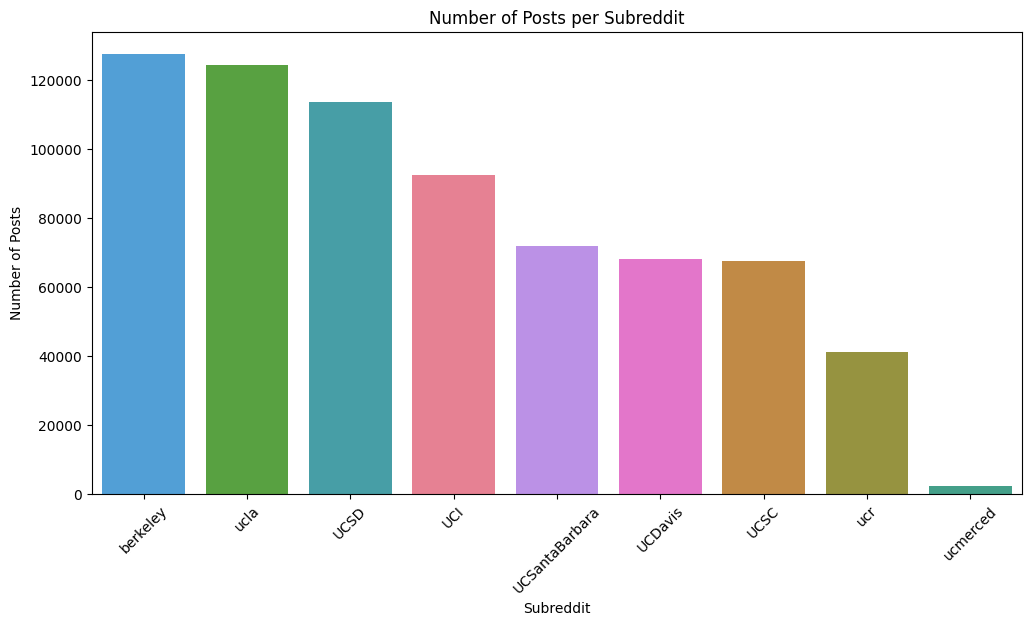

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your dataframe is called ‘df’
subreddit_counts = posts_df["subreddit"].value_counts().reset_index()
subreddit_counts.columns = ["subreddit", "count"]
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="subreddit", y="count", data=subreddit_counts, palette=color_dict)
plt.title("Number of Posts per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if needed
plt.show()

## Comments

In [ ]:
comments = pd.concat([
    pd.read_csv("./subreddit_data/comments/uci_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucsc_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucr_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucla_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucdavis_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucmerced_comments_2010_2023present.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucsd_comments_2010_2023_combined.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/berkeley_comments_2010_2023_combined.csv", usecols=['subreddit', 'id', 'body', 'link_id']),
    pd.read_csv("./subreddit_data/comments/ucsantabarbara_comments_2010_2023.csv", usecols=['subreddit', 'id', 'body', 'link_id'])
])



In [ ]:
comments.subreddit.unique()

array(['UCI', nan, 'UCSC', '0.0', 'ucr', '1552500512.0', 'ucla',
       'UCDavis', '1', '3', '15', 'ucmerced', '2012-04-17 21:07:31',
       'UCSD', '2013-10-09', '6cd676151eaa5bdf73831a5720a0291fa040bf44',
       'berkeley', 'UCSantaBarbara', '2014-07-31 15:44:32',
       '2013-05-18 02:57:07', '2014-07-10 00:32:16',
       '2014-10-09 21:53:39', '2014-07-14 04:26:07',
       '2014-05-27 21:59:24', '2013-09-02 08:41:58',
       '2013-06-19 17:42:40', '2013-04-04 03:30:11',
       '2013-08-25 15:56:50', '2016-04-05 22:43:33',
       '2023-01-28 05:06:58', '2014-05-24 16:08:52',
       '2014-05-24 05:28:28'], dtype=object)

In [ ]:
string = " or ".join("subreddit == '{0}'".format(x) for x in ['UCI', 'UCSC', 'ucr', 'ucla', 'ucmerced', 'UCSD', 'berkeley', 'UCSantaBarbara', 'UCDavis'])

In [ ]:
comments_df = comments.query(string).reset_index(drop=True)

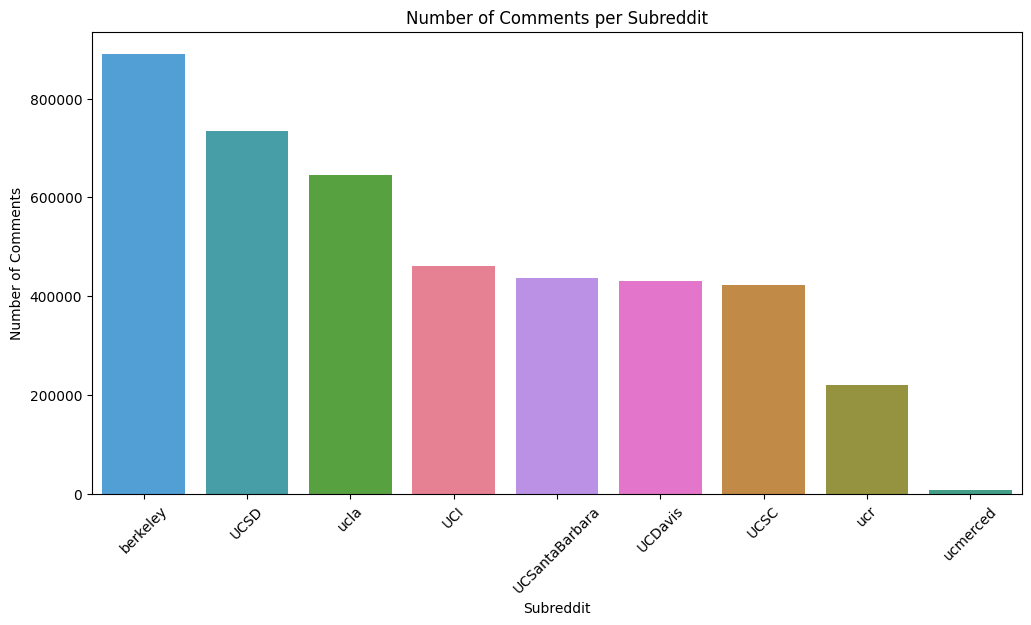

In [ ]:
# Assuming your dataframe is called ‘df’
subreddit_counts = comments_df["subreddit"].value_counts().reset_index()
subreddit_counts.columns = ["subreddit", "count"]
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="subreddit", y="count", data=subreddit_counts, palette=color_dict)
plt.title("Number of Comments per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if needed
plt.show()

## Mismatched comments and posts

In [ ]:
posts_df['link_id'] = 't3_' + posts_df['id'].astype(str)

In [ ]:
merge_df = comments_df.merge(posts_df, on='link_id')

In [ ]:
len(merge_df) / len(comments_df)

0.9894727893399246

In [ ]:
len(comments)

4258361

In [ ]:
len(comments_df)

4246424

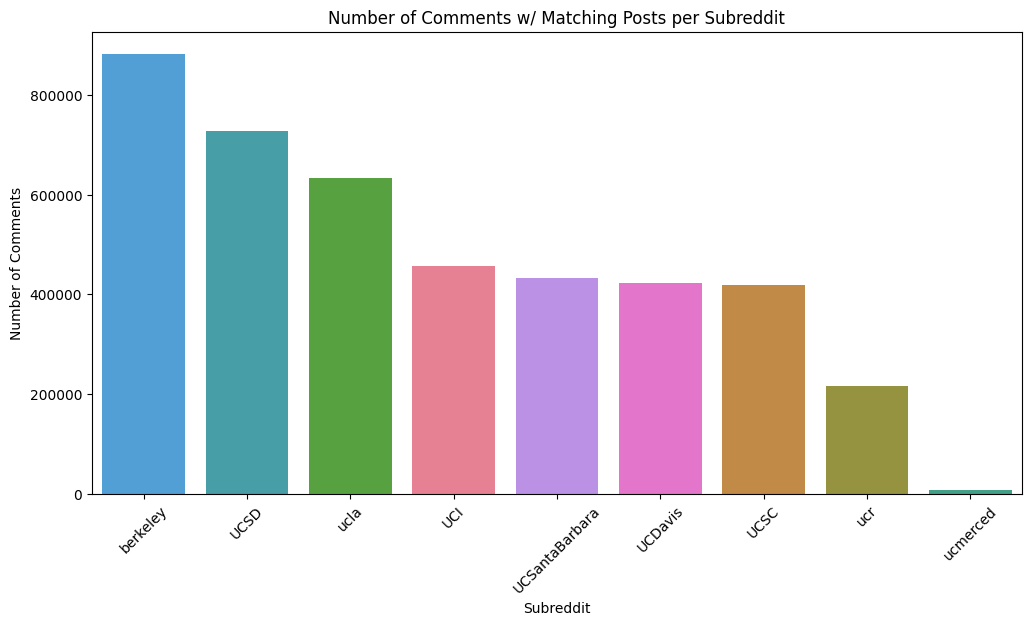

In [ ]:
# Assuming your dataframe is called ‘df’
subreddit_counts = merge_df["subreddit_x"].value_counts().reset_index()
subreddit_counts.columns = ["subreddit", "count"]
# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="subreddit", y="count", data=subreddit_counts, palette=color_dict)
plt.title("Number of Comments w/ Matching Posts per Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if needed
plt.show()

## Labels

In [6]:
df = pd.concat([pd.read_csv('./labeling_data/academichousing.csv'),pd .read_csv('./labeling_data/nonacademichousing.csv')])

In [4]:
filtered_df = df.query("`Majority Vote` == `Majority Vote`")
filtered_df.drop('id', axis=1, inplace=True)
filtered_df['Majority Vote'] = filtered_df['Majority Vote'].str.upper()
filtered_df['labels'] = filtered_df['Majority Vote'].apply(lambda x: [label.strip() for label in x.split('\n')])

NameError: ignored

In [ ]:
filtered_df = filtered_df[['title', 'text', 'post_id', 'fortinoj@uci.edu', 'kangml@uci.edu',
       'kezhang@uci.edu', 'suyeoj2@uci.edu', 'wregiste@uci.edu',
       'Majority Vote', 'labels']].copy()

In [ ]:
old_labels = pd.read_csv('./Notebooks/labled_data_without_removed.csv')
from collections import Counter
def majority_vote(row):
    labels = row[['warren_label(s)', 'justin_labels', 'melissa_labels', 'kevin_labels', 'ally_labels']].tolist()
    labels = [label.strip() for label in labels]  # Add this line to strip spaces
    count = Counter(labels)
    majority_label = [k for k, v in count.items() if v == max(count.values())]
    majority_label = [label.strip() for label in majority_label]  # Add this line to strip spaces again
    return ','.join(majority_label)

In [ ]:
old_labels['justin_labels'] = old_labels['justin_labels'].apply(lambda x: 'MARKETPLACE' if 'sports' in x else x)
old_labels['warren_label(s)'] = old_labels['warren_label(s)'].apply(lambda x: 'MARKETPLACE' if 'sports' in x else x)
old_labels['ally_labels'] = old_labels['ally_labels'].apply(lambda x: 'MARKETPLACE' if 'sports' in x else x)
old_labels['melissa_labels'] = old_labels['melissa_labels'].apply(lambda x: 'MARKETPLACE' if 'sports' in x else x)
old_labels['kevin_labels'] = old_labels['kevin_labels'].apply(lambda x: 'MARKETPLACE' if 'sports' in x else x)
old_labels['Majority Vote'] = old_labels.apply(lambda row: majority_vote(row), axis=1)
old_labels['Majority Vote'] = old_labels['Majority Vote'].str.upper()
old_labels['labels'] = old_labels['Majority Vote'].apply(lambda x: [label.strip() for label in x.split(',')])
old_labels = old_labels[['title', 'selftext', 'id', 'justin_labels',
       'melissa_labels', 'kevin_labels', 'ally_labels','warren_label(s)', 'Majority Vote', 'labels']].copy()
old_labels.columns = filtered_df.columns

In [ ]:
filtered_df = pd.concat([filtered_df, old_labels]).reset_index(drop=True)
filtered_df['Majority Vote'] = filtered_df['Majority Vote'].str.upper()
filtered_df['labels'] = filtered_df['labels'].apply(lambda labels: list(set(labels)))

In [ ]:
label_df = pd.get_dummies(filtered_df['labels'].apply(pd.Series).stack()).sum(level=0)
df_encoded = filtered_df.join(label_df)

<ipython-input-50-ed84b627f387>:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  label_df = pd.get_dummies(filtered_df['labels'].apply(pd.Series).stack()).sum(level=0)


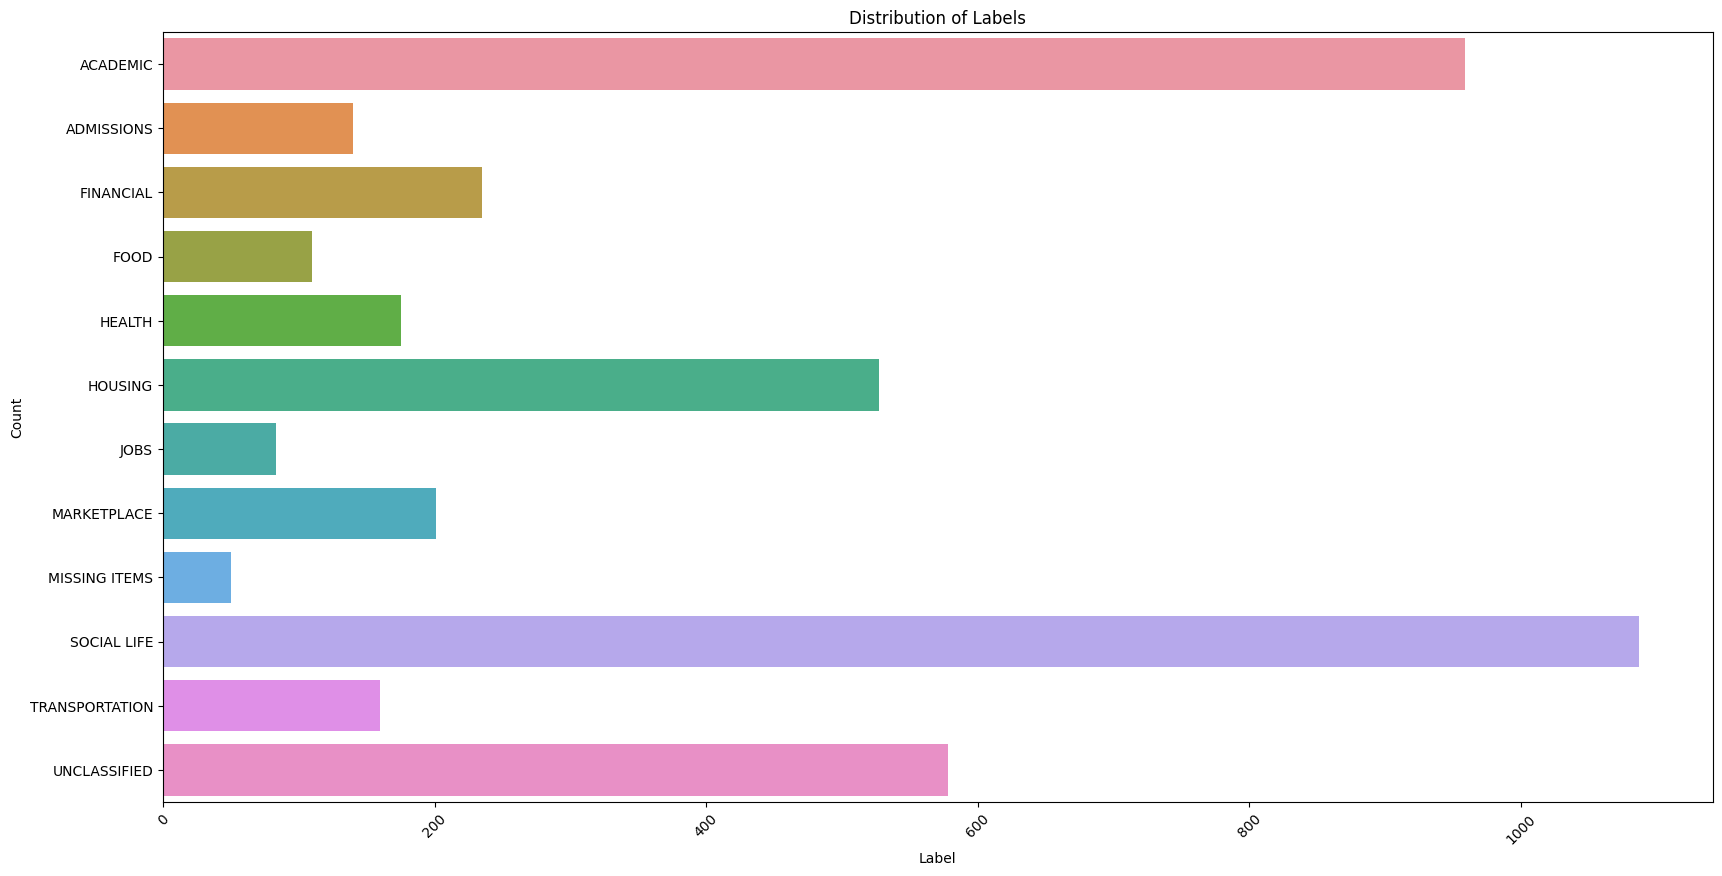

In [ ]:
# Plot the distribution of labels
plt.figure(figsize=(20, 10))
label_counts = label_df.sum().reset_index()
label_counts.columns = ['Label', 'Count']
sns.barplot(x='Count', y='Label', data=label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Labels')
plt.show()

In [ ]:
df_encoded.to_csv('./labeling_data/all_labels_encoded_may7.csv', index=False)

In [ ]:
max(df_encoded['MARKETPLACE'])

1